In [2]:
import os
from glob import glob
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import RocCurveDisplay, auc, mean_squared_error, roc_curve
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.utils.fixes import loguniform
from scipy.interpolate import interp1d


In [3]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print(PATH_ROOT)

C:\Users\Behzad\Desktop\KatJupy\diva-data-poisoning


In [4]:
path_output = os.path.join(PATH_ROOT, 'results_plot')

In [5]:
NAMES = {
    'falfa_nn': 'FALFA',
    'alfa_svm': 'ALFA',
    'poison_svm': 'PoisSVM',
}
COLORS_1 = {
    'Hard': '#9c27b0',
    'Normal': '#1976d2',
    'Easy': '#f57f17',
}
COLORS_2 = {
    'falfa_nn': '#d32f2f',
    'alfa_svm': '#1976d2',
    'poison_svm': '#388e3c',
}
COLORS_3 = {
    'Hard': '#d32f2f',
    'Normal': '#1976d2',
    'Easy': '#388e3c',
}
DIF_LEVELS = ['Hard', 'Normal', 'Easy']

In [6]:
pd.read_csv(os.path.join(path_output, f'real_roc_mean_falfa_nn.csv'))

,fpr,tpr
0,0.000000,0.000000
1,0.052632,0.437143
2,0.105263,0.514286
3,0.157895,0.542857
4,0.210526,0.617143
5,0.263158,0.640000
6,0.315789,0.682857
7,0.368421,0.728571
8,0.421053,0.765714
9,0.473684,0.780000


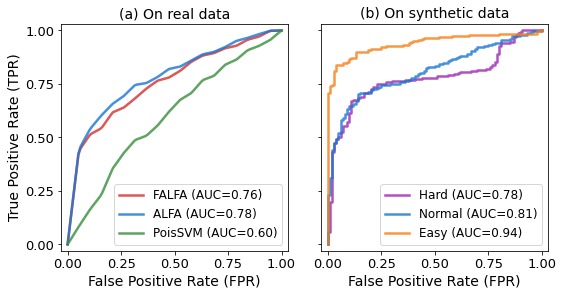

In [5]:
FONTSIZE = 13
FIGSIZE = (8, 4)
TITLES = [
    '(a) On real data',
    '(b) On synthetic data',
]
LINE_WIDTH = 2.5

plt.rcParams["font.size"] = FONTSIZE
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=FIGSIZE)

for att in ['falfa_nn', 'alfa_svm', 'poison_svm']:
    df_ = pd.read_csv(os.path.join(path_output, f'real_roc_mean_{att}.csv'))
    fpr_ = df_['fpr'].to_numpy()
    tpr_ = df_['tpr'].to_numpy()
    roc_auc_ = auc(fpr_, tpr_)

    func = interp1d(fpr_, tpr_, kind='slinear')
    fpr_smooth = np.linspace(0, 1, 100, endpoint=True)
    tpr_smooth = func(fpr_smooth)
    roc_display = RocCurveDisplay(fpr=fpr_smooth, tpr=tpr_smooth, roc_auc=roc_auc_).plot(
        ax=axes[0], name=NAMES[att], c=COLORS_2[att], alpha=0.8, linewidth=LINE_WIDTH)

for dif in DIF_LEVELS:
    df_ = pd.read_csv(os.path.join(path_output, f'synth_roc_{dif}.csv'))
    fpr_ = df_['fpr'].to_numpy()
    tpr_ = df_['tpr'].to_numpy()
    roc_auc_ = auc(fpr_, tpr_)
    roc_display = RocCurveDisplay(fpr=fpr_, tpr=tpr_, roc_auc=roc_auc_).plot(
        ax=axes[1], name=dif, c=COLORS_1[dif], alpha=0.8, linewidth=LINE_WIDTH)

label_dict = {}
for i in range(2):
    ax = axes[i]
    ax.set_aspect('equal')
    ax.set_ylabel('')
    ax.set_xlabel('False Positive Rate (FPR)', fontsize=FONTSIZE+1)
    ax.set(xlim=[-0.03, 1.03], ylim=[-0.03, 1.03])
    ax.set_xticks(np.linspace(0, 1, num=5), fontsize=FONTSIZE-1)
    ax.set_yticks(np.linspace(0, 1, num=5), fontsize=FONTSIZE-1)
    ax.set_title(TITLES[i], fontsize=FONTSIZE+1)

    lines, labels = ax.get_legend_handles_labels()
    labels = [s.split()[0] + ' ' + ''.join(s.split()[1:]) for s in labels]
    ax.legend(lines, labels, fontsize=FONTSIZE-1, loc='lower right')

axes[0].set_ylabel('True Positive Rate (TPR)', fontsize=FONTSIZE+1)

plt.tight_layout(pad=0.8)
plt.savefig(os.path.join(path_output, 'roc.pdf'), dpi=300)

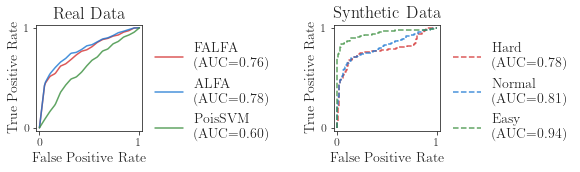

In [41]:
FIGSIZE = (8, 2.5)
LINE_WIDTH = 1.5
sns.set_style("ticks", rc={"font.size": 11})
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.size": 14, "xtick.labelsize": 12, "ytick.labelsize": 12})
LINEWIDTH = 1.5
fig, axs = plt.subplots(1, 2, figsize=FIGSIZE)

for att in ['falfa_nn', 'alfa_svm', 'poison_svm']:
    df_ = pd.read_csv(os.path.join(path_output, f'real_roc_mean_{att}.csv'))
    fpr_ = df_['fpr'].to_numpy()
    tpr_ = df_['tpr'].to_numpy()
    roc_auc_ = auc(fpr_, tpr_)

    func = interp1d(fpr_, tpr_, kind='slinear')
    fpr_smooth = np.linspace(0, 1, 100, endpoint=True)
    tpr_smooth = func(fpr_smooth)
    roc_display = RocCurveDisplay(fpr=fpr_smooth, tpr=tpr_smooth, roc_auc=roc_auc_).plot(
        ax=axs[0], name=NAMES[att], c=COLORS_2[att], alpha=0.8, linewidth=LINE_WIDTH)


label_dict = {}
axs[0].set(adjustable='box', aspect='equal')
axs[0].set_ylabel('')
axs[0].set_xlabel('False Positive Rate')#, fontsize=FONTSIZE+1)
axs[0].set(xlim=[-0.03, 1.03], ylim=[-0.03, 1.03])
axs[0].set_xticks(np.linspace(0, 1, num=2))#, fontsize=FONTSIZE-1)
axs[0].set_yticks(np.linspace(0, 1, num=2))#, fontsize=FONTSIZE-1)

lines, labels = axs[0].get_legend_handles_labels()
labels = [s.split()[0] + '\n' + ''.join(s.split()[1:]) for s in labels]
axs[0].legend(lines, labels, bbox_to_anchor=(1, 0.95), loc="upper left", frameon=False)

axs[0].set_ylabel('True Positive Rate')#, fontsize=FONTSIZE+1)
axs[0].set_title('Real Data')


for dif in DIF_LEVELS:
    df_ = pd.read_csv(os.path.join(path_output, f'synth_roc_{dif}.csv'))
    fpr_ = df_['fpr'].to_numpy()
    tpr_ = df_['tpr'].to_numpy()
    roc_auc_ = auc(fpr_, tpr_)
    roc_display = RocCurveDisplay(fpr=fpr_, tpr=tpr_, roc_auc=roc_auc_).plot(
        ax=axs[1], name=dif, c=COLORS_3[dif], alpha=0.8, linewidth=LINE_WIDTH, ls='--')


label_dict = {}
axs[1].set(adjustable='box', aspect='equal')
axs[1].set_ylabel('')
axs[1].set_xlabel('False Positive Rate')#, fontsize=FONTSIZE+1)
axs[1].set(xlim=[-0.03, 1.03], ylim=[-0.03, 1.03])
axs[1].set_xticks(np.linspace(0, 1, num=2))#, fontsize=FONTSIZE-1)
axs[1].set_yticks(np.linspace(0, 1, num=2))#, fontsize=FONTSIZE-1)

lines, labels = axs[1].get_legend_handles_labels()
labels = [s.split()[0] + '\n' + ''.join(s.split()[1:]) for s in labels]
axs[1].legend(lines, labels, bbox_to_anchor=(1, 0.95), loc="upper left", frameon=False)

axs[1].set_ylabel('True Positive Rate')#, fontsize=FONTSIZE+1)
axs[1].set_title('Synthetic Data')


plt.tight_layout(pad=0.8)
fig.subplots_adjust(wspace=0.9)
plt.savefig(os.path.join(path_output, 'roc.pdf'), dpi=300)

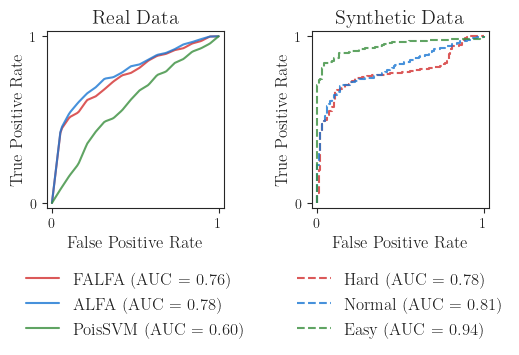

In [7]:
FIGSIZE = (5, 3.5)
LINE_WIDTH = 1.5
sns.set_style("ticks", rc={"font.size": 9})
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.size": 12, "xtick.labelsize": 10, "ytick.labelsize": 10})
LINEWIDTH = 1.5
fig, axs = plt.subplots(1, 2, figsize=FIGSIZE)

for att in ['falfa_nn', 'alfa_svm', 'poison_svm']:
    df_ = pd.read_csv(os.path.join(path_output, f'real_roc_mean_{att}.csv'))
    fpr_ = df_['fpr'].to_numpy()
    tpr_ = df_['tpr'].to_numpy()
    roc_auc_ = auc(fpr_, tpr_)

    func = interp1d(fpr_, tpr_, kind='slinear')
    fpr_smooth = np.linspace(0, 1, 100, endpoint=True)
    tpr_smooth = func(fpr_smooth)
    roc_display = RocCurveDisplay(fpr=fpr_smooth, tpr=tpr_smooth, roc_auc=roc_auc_).plot(
        ax=axs[0], name=NAMES[att], c=COLORS_2[att], alpha=0.8, linewidth=LINE_WIDTH)


label_dict = {}
axs[0].set(adjustable='box', aspect='equal')
axs[0].set_ylabel('')
axs[0].set_xlabel('False Positive Rate')#, fontsize=FONTSIZE+1)
axs[0].set(xlim=[-0.03, 1.03], ylim=[-0.03, 1.03])
axs[0].set_xticks(np.linspace(0, 1, num=2))#, fontsize=FONTSIZE-1)
axs[0].set_yticks(np.linspace(0, 1, num=2))#, fontsize=FONTSIZE-1)

lines, labels = axs[0].get_legend_handles_labels()
#labels = [s.split()[0] + '\n' + ''.join(s.split()[1:]) for s in labels]
axs[0].legend(lines, labels, bbox_to_anchor=(0.5,-0.55), loc="center", ncol=1, frameon=False)

axs[0].set_ylabel('True Positive Rate')#, fontsize=FONTSIZE+1)
axs[0].set_title('Real Data')


for dif in DIF_LEVELS:
    df_ = pd.read_csv(os.path.join(path_output, f'synth_roc_{dif}.csv'))
    fpr_ = df_['fpr'].to_numpy()
    tpr_ = df_['tpr'].to_numpy()
    roc_auc_ = auc(fpr_, tpr_)
    roc_display = RocCurveDisplay(fpr=fpr_, tpr=tpr_, roc_auc=roc_auc_).plot(
        ax=axs[1], name=dif, c=COLORS_3[dif], alpha=0.8, linewidth=LINE_WIDTH, ls='--')


label_dict = {}
axs[1].set(adjustable='box', aspect='equal')
axs[1].set_ylabel('')
axs[1].set_xlabel('False Positive Rate')#, fontsize=FONTSIZE+1)
axs[1].set(xlim=[-0.03, 1.03], ylim=[-0.03, 1.03])
axs[1].set_xticks(np.linspace(0, 1, num=2))#, fontsize=FONTSIZE-1)
axs[1].set_yticks(np.linspace(0, 1, num=2))#, fontsize=FONTSIZE-1)

lines, labels = axs[1].get_legend_handles_labels()
#labels = [s.split()[0] + '\n' + ''.join(s.split()[1:]) for s in labels]
axs[1].legend(lines, labels, bbox_to_anchor=(0.5,-0.55), loc="center", ncol=1, frameon=False)

axs[1].set_ylabel('True Positive Rate')#, fontsize=FONTSIZE+1)
axs[1].set_title('Synthetic Data')


plt.tight_layout(pad=0)
fig.subplots_adjust(wspace=0.5)
plt.savefig(os.path.join(path_output, 'roc.pdf'), dpi=300)

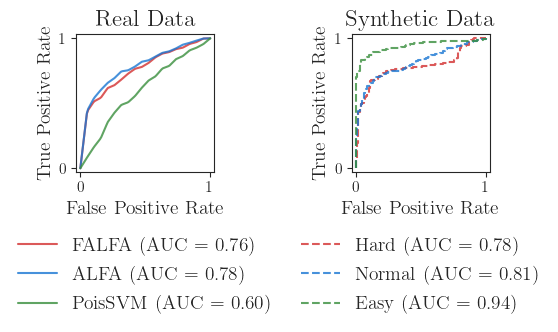

In [18]:
FIGSIZE = (5, 3.5)
LINE_WIDTH = 1.5
sns.set_style("ticks", rc={"font.size": 1})
plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.size": 14, "xtick.labelsize": 11, "ytick.labelsize": 11})
LINEWIDTH = 1.5
fig, axs = plt.subplots(1, 2, figsize=FIGSIZE)

for att in ['falfa_nn', 'alfa_svm', 'poison_svm']:
    df_ = pd.read_csv(os.path.join(path_output, f'real_roc_mean_{att}.csv'))
    fpr_ = df_['fpr'].to_numpy()
    tpr_ = df_['tpr'].to_numpy()
    roc_auc_ = auc(fpr_, tpr_)

    func = interp1d(fpr_, tpr_, kind='slinear')
    fpr_smooth = np.linspace(0, 1, 100, endpoint=True)
    tpr_smooth = func(fpr_smooth)
    roc_display = RocCurveDisplay(fpr=fpr_smooth, tpr=tpr_smooth, roc_auc=roc_auc_).plot(
        ax=axs[0], name=NAMES[att], c=COLORS_2[att], alpha=0.8, linewidth=LINE_WIDTH)


label_dict = {}
axs[0].set(adjustable='box', aspect='equal')
axs[0].set_ylabel('')
axs[0].set_xlabel('False Positive Rate')#, fontsize=FONTSIZE+1)
axs[0].set(xlim=[-0.03, 1.03], ylim=[-0.03, 1.03])
axs[0].set_xticks(np.linspace(0, 1, num=2))#, fontsize=FONTSIZE-1)
axs[0].set_yticks(np.linspace(0, 1, num=2))#, fontsize=FONTSIZE-1)

lines, labels = axs[0].get_legend_handles_labels()
#labels = [s.split()[0] + '\n' + ''.join(s.split()[1:]) for s in labels]
axs[0].legend(lines, labels, bbox_to_anchor=(0.5,-0.75), loc="center", ncol=1, frameon=False)

axs[0].set_ylabel('True Positive Rate')#, fontsize=FONTSIZE+1)
axs[0].set_title('Real Data')


for dif in DIF_LEVELS:
    df_ = pd.read_csv(os.path.join(path_output, f'synth_roc_{dif}.csv'))
    fpr_ = df_['fpr'].to_numpy()
    tpr_ = df_['tpr'].to_numpy()
    roc_auc_ = auc(fpr_, tpr_)
    roc_display = RocCurveDisplay(fpr=fpr_, tpr=tpr_, roc_auc=roc_auc_).plot(
        ax=axs[1], name=dif, c=COLORS_3[dif], alpha=0.8, linewidth=LINE_WIDTH, ls='--')


label_dict = {}
axs[1].set(adjustable='box', aspect='equal')
axs[1].set_ylabel('')
axs[1].set_xlabel('False Positive Rate')#, fontsize=FONTSIZE+1)
axs[1].set(xlim=[-0.03, 1.03], ylim=[-0.03, 1.03])
axs[1].set_xticks(np.linspace(0, 1, num=2))#, fontsize=FONTSIZE-1)
axs[1].set_yticks(np.linspace(0, 1, num=2))#, fontsize=FONTSIZE-1)

lines, labels = axs[1].get_legend_handles_labels()
#labels = [s.split()[0] + '\n' + ''.join(s.split()[1:]) for s in labels]
axs[1].legend(lines, labels, bbox_to_anchor=(0.5,-0.75), loc="center", ncol=1, frameon=False)

axs[1].set_ylabel('True Positive Rate')#, fontsize=FONTSIZE+1)
axs[1].set_title('Synthetic Data')


plt.tight_layout(pad=0)
fig.subplots_adjust(wspace=1)
plt.savefig(os.path.join(path_output, 'roc.pdf'), dpi=300)